<a href="https://colab.research.google.com/github/supanut-suntikoon/MunRiverResearch/blob/main/MunRiverResearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical Analysis: Mineral Weathering Rate vs Biomass Degradation Rate

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pull data from GitHub repo
url = 'https://raw.githubusercontent.com/supanut-suntikoon/MunRiverResearch/main/MinW_BioDeg.csv'

# Load data directly from GitHub
data = pd.read_csv(url)

data

,StationID,dry season mineral weathering,dry season biomass degradation,wet season mineral weathering,wet season biomass degradation
0,M01,15.17,27.35,79.3,100
1,M02,15.34,12.65,135.4,98
2,M03,10.33,10.02,895.2,885.3
3,M04,0.15,100,370.2,316.4
4,M05,10.48,10.02,1671.4,6286.5
5,M06,1.37,10.08,154.4,115.1
6,M07,1.67,10,163.7,100
7,M08,85.34,118.99,410.44,603.06
8,M09,183.2,255.42,881.06,1294.54
9,M10,0.63,9.92,270.6,108.7


ANOVA results for Mineral Weathering Rate: F-value = 13.3279, p-value = 0.0009
ANOVA results for Biomass Degradation Rate: F-value = 3.0270, p-value = 0.0915


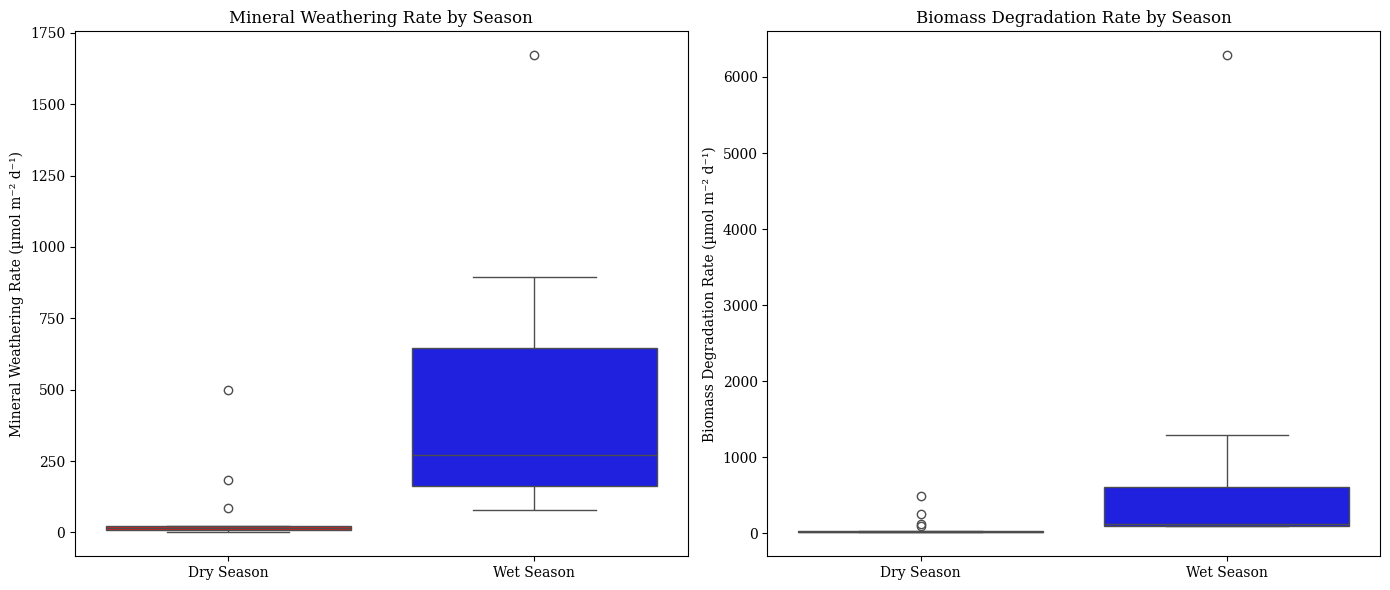

In [2]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pull data from GitHub repo
url = 'https://raw.githubusercontent.com/supanut-suntikoon/MunRiverResearch/main/MinW_BioDeg.csv'

# Load your data directly from GitHub
data = pd.read_csv(url)

# Display the first few rows of the dataset to understand its structure
# print(data.head())
df = pd.DataFrame(data)

df.replace('-', np.nan, inplace=True)

# Remove the 'Total' row and rows with NaN values for ANOVA
df = df.dropna().iloc[:-1]

# Convert the relevant columns to floats
df['dry season mineral weathering'] = df['dry season mineral weathering'].astype(float)
df['dry season biomass degradation'] = df['dry season biomass degradation'].astype(float)
df['wet season mineral weathering'] = df['wet season mineral weathering'].astype(float)
df['wet season biomass degradation'] = df['wet season biomass degradation'].astype(float)

# ANOVA for Mineral Weathering Rate
f_val_mwr, p_val_mwr = stats.f_oneway(df['dry season mineral weathering'], df['wet season mineral weathering'])

# ANOVA for Biomass Degradation Rate
f_val_bdr, p_val_bdr = stats.f_oneway(df['dry season biomass degradation'], df['wet season biomass degradation'])

# Print the ANOVA results
print(f'ANOVA results for Mineral Weathering Rate: F-value = {f_val_mwr:.4f}, p-value = {p_val_mwr:.4f}')
print(f'ANOVA results for Biomass Degradation Rate: F-value = {f_val_bdr:.4f}, p-value = {p_val_bdr:.4f}')

# Set font to Times New Roman or similar serif font
plt.rcParams['font.family'] = 'serif'

# Visualize the distribution of the data
plt.figure(figsize=(14, 6))

# Mineral Weathering Rate
plt.subplot(1, 2, 1)
sns.boxplot(data=[df['dry season mineral weathering'], df['wet season mineral weathering']],
            palette=["red", "blue"])
plt.xticks([0, 1], ['Dry Season', 'Wet Season'])
plt.ylabel('Mineral Weathering Rate (µmol m⁻² d⁻¹)')
plt.title('Mineral Weathering Rate by Season')

# Biomass Degradation Rate
plt.subplot(1, 2, 2)
sns.boxplot(data=[df['dry season biomass degradation'], df['wet season biomass degradation']],
            palette=["red", "blue"])
plt.xticks([0, 1], ['Dry Season', 'Wet Season'])
plt.ylabel('Biomass Degradation Rate (µmol m⁻² d⁻¹)')
plt.title('Biomass Degradation Rate by Season')

plt.tight_layout()

# Save the plot as a PNG file with 100 dpi
plt.savefig('seasonal_comparison_plot.png', dpi=100, format='png')

# Display the plot
plt.show()


# PhysicoParams

In [3]:
import pandas as pd

# Load data from the given URL
url = 'https://raw.githubusercontent.com/supanut-suntikoon/MunRiverResearch/main/PhysicoParams.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataframe
df

,StationID,Seasons,Temp,Dissolved_Oxygen,Cond,pH,Na,K,Ca,Mg,Cl,HCO3,NO3,SO4,Si,Flowrate (m3/s),TDS,Alk
0,M01,Dry,26.0,7.0,507,7.4,38.82,7.65,46.92,8.07,45.62,200.39,2.73,15.60,7.78,0.9223,381.55,164.36
1,M02,Dry,28.1,5.1,348,7.6,39.52,10.60,10.93,5.29,49.86,80.52,4.07,13.04,10.51,0.3968,235.00,66.04
2,M03,Dry,29.9,8.2,2449,7.8,369.60,6.90,62.50,16.18,668.55,174.77,-,6.48,13.47,0.0373,1332.07,143.34
3,M04,Dry,26.6,6.2,252,7.5,26.81,8.23,10.40,4.49,35.29,53.07,3.81,13.89,12.23,0.0037,180.59,43.53
4,M05,Dry,28.4,7.5,979,7.7,134.80,14.05,29.99,11.60,215.67,146.40,-,18.34,8.02,0.0373,587.10,120.07
5,M06,Dry,26.8,6.6,300,7.7,26.29,5.12,22.05,7.55,27.61,120.78,-,4.60,11.25,0.0373,236.85,99.06
6,M07,Dry,28.0,5.2,313,7.4,26.60,5.21,18.64,5.50,56.37,63.14,0.36,2.16,11.94,0.224,202.07,51.79
7,M08,Dry,28.3,6.5,950,7.6,141.20,6.07,27.64,7.88,235.12,92.42,1.11,17.54,11.92,9.2113,784.09,68.30
8,M09,Dry,26.9,6.0,994,7.6,161.50,4.02,23.78,6.19,270.44,72.29,0.68,13.68,12.43,11.4092,577.66,59.29
9,M10,Dry,26.2,6.3,279,7.2,21.51,2.57,25.58,3.23,67.99,22.88,0.21,3.23,4.87,0.0373,157.09,18.77


In [4]:
df.columns

Index(['StationID', 'Seasons', 'Temp', 'Dissolved_Oxygen', 'Cond', 'pH', 'Na',
       'K', 'Ca', 'Mg', 'Cl', 'HCO3', 'NO3', 'SO4', 'Si', 'Flowrate (m3/s)',
       'TDS', 'Alk'],
      dtype='object')

In [5]:
df.replace('-', np.nan, inplace=True)

In [6]:
df.columns[2:]

Index(['Temp', 'Dissolved_Oxygen', 'Cond', 'pH', 'Na', 'K', 'Ca', 'Mg', 'Cl',
       'HCO3', 'NO3', 'SO4', 'Si', 'Flowrate (m3/s)', 'TDS', 'Alk'],
      dtype='object')

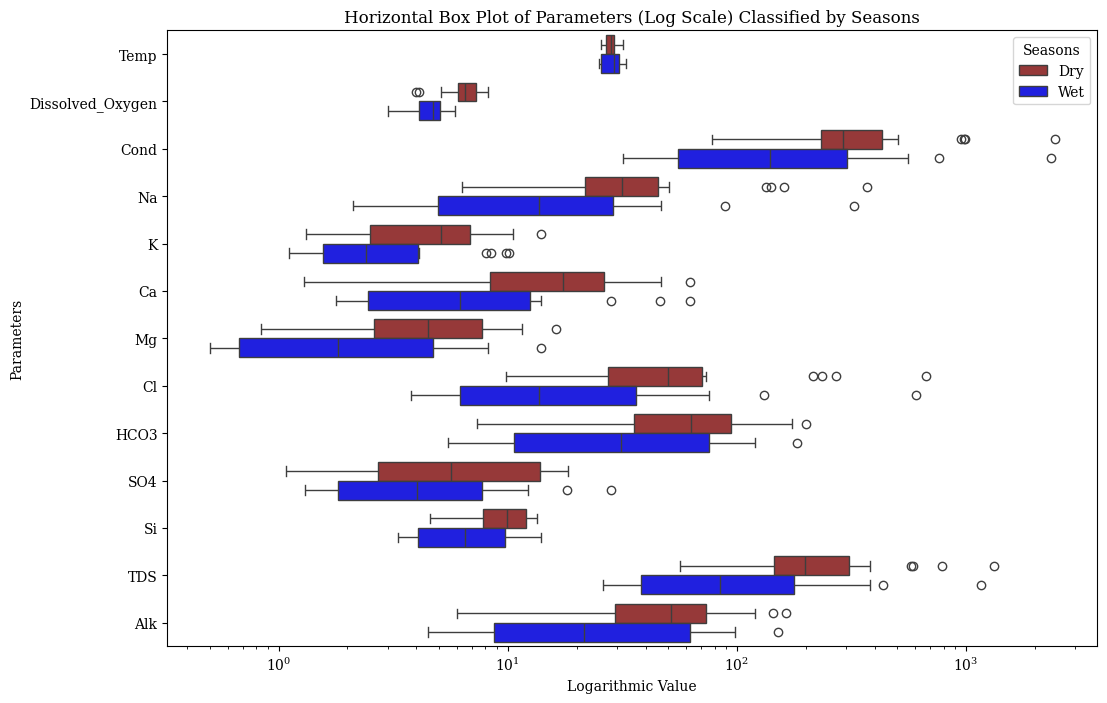

In [7]:
# Create a horizontal box plot classified by 'Seasons' for selected parameters on a log scale with specified colors
plt.figure(figsize=(12, 8))

# Define the color palette with brown for dry and blue for wet seasons
palette = {'Dry': 'brown', 'Wet': 'blue'}

# Create a horizontal box plot for selected parameters on a log scale
selected_columns = ['Temp', 'Dissolved_Oxygen', 'Cond', 'Na', 'K', 'Ca', 'Mg', 'Cl', 'HCO3', 'SO4', 'Si', 'TDS','Alk']
# selected_columns = df.columns[2:]

# Create the box plot grouped by 'Seasons' with the specified colors and log scale
sns.boxplot(data=df.melt(id_vars=['Seasons'], value_vars=selected_columns),
            x='value', y='variable', hue='Seasons', orient='h', palette=palette)

# Set the x-axis to a logarithmic scale
plt.xscale('log')

# Add labels and title
plt.title('Horizontal Box Plot of Parameters (Log Scale) Classified by Seasons')
plt.xlabel('Logarithmic Value')
plt.ylabel('Parameters')

# Display the plot
plt.show()


In [8]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
import requests
from io import StringIO

# URL of the raw CSV file on GitHub
url = 'https://raw.githubusercontent.com/supanut-suntikoon/MunRiverResearch/main/PhysicoParams.csv'

# Pull the CSV file from GitHub
response = requests.get(url)
csv_data = response.text

# Load the CSV data into a DataFrame
df = pd.read_csv(StringIO(csv_data))

# Assuming 'Seasons' column indicates 'Wet' or 'Dry'
# Automatically detect numerical columns (parameters) for K-S test
parameters = df.select_dtypes(include=[np.number]).columns.tolist()

# Initialize an empty dictionary to store K-S test results
ks_results = {}

# Perform K-S test for each parameter
for param in parameters:
    wet_data = df[df['Seasons'] == 'Wet'][param].dropna()
    dry_data = df[df['Seasons'] == 'Dry'][param].dropna()

    # Calculate K-S test
    ks_stat, p_value = ks_2samp(wet_data, dry_data)

    # Store results in dictionary
    ks_results[param] = {'K-S Statistic': ks_stat, 'p-value': p_value}

# Convert results to DataFrame for easy viewing
ks_df = pd.DataFrame(ks_results).T
print(ks_df)


                  K-S Statistic   p-value
Temp                   0.263158  0.537929
Dissolved_Oxygen       0.789474  0.000004
Cond                   0.473684  0.026749
pH                     0.473684  0.026749
Na                     0.421053  0.068089
K                      0.368421  0.153173
Ca                     0.368421  0.153173
Mg                     0.421053  0.068089
Cl                     0.473684  0.026749
HCO3                   0.315789  0.305689
SO4                    0.263158  0.537929
Si                     0.526316  0.009224
TDS                    0.526316  0.009224
Alk                    0.368421  0.153173
